[chloeuhls.github.io](https://chloeu99.github.io/)

Data Science Final Tutorial
Jacob Waxman and Chloe Uhls

# Analysis Of Homelessness In The United States

### Introduction

For our final tutorial we will be analyzing homelessness in the United States. We are diving into the current state of homelessness, the change over time, and factors that have the biggest impact on homelessness. Furthermore, we will break down our analysis on a national level and at the state level, highlighting the observations we find in Louisiana. Stats that we will be looking for include total homeless population, rate of homelessness, the population demographics. We will also look for variables correlating with the rate of homelessness at the state level. These factors will include geographic location, local politics, and minimum wage. 

We will divide our analysis into 3 parts.

#### 1. National Observations - Analyzing Key Homeless Statistics 

#### 2. Regional Impacts - Analyzing On A State-By-State Basis, Highlighting Louisiana, And Finding Correlated Variables 

#### 3. Future Projections - Predicting The State Of Homelessness in 2021 and Beyond

### Collaboration Plan

Throughout the semester we will be meeting twice a week to work on our project. We will meet virtually via Zoom and in person depending on the week. We have a Github repository (https://github.com/chloeu99/chloeu99.github.io) to collaborate and save our coding progress. We use Google Docs for written reports, then upload it to Github to keep everything organized. In terms of coding, we will use the same strategies that we learned in class: Python coding and data scraping and the pandas library for analysis.

### Datasets Used

#### 1. 2020 PIT Estimates by State from HUD exchange                                                         

Link: https://www.huduser.gov/portal/sites/default/files/xls/2007-2020-PIT-Estimates-by-state.xlsx

This data was really exciting to find. The HUD does a great job posting their records on a yearly basis. We downloaded the excel sheet and uploaded it to our public Github. The spreadsheet breaks homelessness down into specific categories including total homelessness by state, demographics, and status of homeless citizens (sheltered, unsheltered, etc). 

Example Questions: How many people are homeless in Louisiana? Is one gender or one race more likely to be homeless on a national level?


#### 2. List Of US States By Historical Population

Link: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_historical_population

This Wikipedia table holds the census data for the population of each state every 10 years. It will be helpful when both thw 2020 status of homelessness, and analyzing change of homeless over time. We can sum up each state to find total population and break down the country by states. 

Example Question: In the HUD data it is clear that California has the highest homeless population, but is it a higher population out of their total population than other states?


#### 3. Minnimum Wage By State (2021)

Link: https://minimumwage.com/in-your-state/

This data contains a table of each state and their minnimum wage. The federal minimum wage has been stagnent at $7.25 since 2009. Not all states have required a higher state-wide minimum wage, but we expect that those with their own regulations will have a lower homeless population.

Example Questions: Is there a correlation between a state's minimum wage and homeless population?

#### 4. Electoral College Results By State (1980-2020)

Link: https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state

We went to Wikipedia to find the state-wide Electoral College results for Presidential Elections. We will be analyzing election results from 1980 to 2020, and will look to see if a state's political consciounce is correlated with its homeless population.

Example Questions: Is there any correlation between a states politics and homeless population? How has national homeless changed as the presidency has changed?

#### 5. Average Temperature By State (2019)

Link: https://worldpopulationreview.com/state-rankings/average-temperatures-by-state

We are predicting that there is a higher homeless population in warmer states. This will be used as an ease-in analysis, something that we believe is fairly obvious. It will show our approach when working with the dataframe.

Example question: Does the coldest state have the lowest homeless population?


# Data Collection

In [83]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from bs4 import BeautifulSoup
# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.options.mode.chained_assignment = None 

### HUD Homelessness Report (2020)

In [93]:
#reading in a HUD csv file from Github
HUD2020 = pd.read_csv("./data/HUD2020.csv")

#keeps most relevant columns
HUD2020 = HUD2020[["State","Overall Homeless, 2020","Overall Homeless - Under 18, 2020", "Overall Homeless - Age 18 to 24, 2020", "Overall Homeless - Over 24, 2020", "Overall Homeless - Female, 2020", "Overall Homeless - Male, 2020", "Overall Homeless - Transgender, 2020", "Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020", "Overall Homeless - White, 2020", "Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020", "Overall Homeless - American Indian or Alaska Native, 2020", "Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020", "Overall Homeless - Multiple Races, 2020",]]

#removes data from additional rows- only 50 states
HUD2020 = HUD2020.drop([3,8,12,27,42,50,56,57])

#columns for state name and id
HUD2020["State ID"] = HUD2020["State"] 
HUD2020["State"] = HUD2020["State"].map({"AK":"Alaska", "AL":"Alabama", "AR": "Arkansas", "AZ": "Arizona", "CA":"California", "CO":"Colorado", "CT":"Connecticut", "DE":"Delaware","FL":"Florida", "GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota", "MO":"Missouri","MS":"Mississippi","MT":"Montana","NC":"North Carolina", "ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NV":"Nevada","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming"})

HUD2020.head()

,State,"Overall Homeless, 2020","Overall Homeless - Under 18, 2020","Overall Homeless - Age 18 to 24, 2020","Overall Homeless - Over 24, 2020","Overall Homeless - Female, 2020","Overall Homeless - Male, 2020","Overall Homeless - Transgender, 2020","Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020","Overall Homeless - White, 2020","Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020","Overall Homeless - American Indian or Alaska Native, 2020","Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020","Overall Homeless - Multiple Races, 2020",State ID
0,Alaska,1949,326,197,1426,828,1114,3,4,126,634,137,22,890,40,226,AK
1,Alabama,3351,528,198,2625,1294,1988,9,4,126,1462,1755,2,37,11,73,AL
2,Arkansas,2366,195,258,1913,798,1561,5,2,53,1353,901,4,42,21,45,AR
4,Arizona,10979,1722,824,8433,4228,6694,43,14,2355,6901,2289,77,1027,60,625,AZ
5,California,161548,16141,13391,132016,53505,105737,1601,705,51966,87439,49610,3240,6386,1784,13089,CA


This table has a row for each state in the US and has a column for different homeles statistics including total people and by categories including age, gender, and race. We cleaned this table to only include the most relevent columns.

### 2020 State Census Data

In [94]:
#Data found for state population over time
r0 = requests.get("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_historical_population")
#parse
root0 = BeautifulSoup(r0.content)
#find table to make df
table0 = root0.find_all("table")[3]
#read html table as df
pop = pd.read_html(str(table0))
#clean
pop = pd.concat(pop)

#remove non-state rows
pop = pop.drop([2,9,12,37,42,48,56])

#remove columns before 1980
pop = pop.drop(columns = ["1960","1970"])

#rename columns
pop = pop.rename(columns={"Name":"State","1980":"1980 Population","1990":"1990 Population","2000":"2000 Population","2010":"2010 Population","2020":"2020 Population"})

pop.head()

,State,1980 Population,1990 Population,2000 Population,2010 Population,2020 Population
0,Alabama,3893888,4040587,4447100,4779736,5024279
1,Alaska,401851,550043,626932,710231,733391
3,Arizona,2718215,3665228,5130632,6392017,7151502
4,Arkansas,2286435,2350725,2673400,2915918,3011524
5,California,23667902,29760021,33871648,37253956,39538223


We will use the state population data to put homelessness into a better perspective. We can compare state homeless data and analyze how it is changing over time. We trimmed our data to start at 1980 to keep it relatively recent findings.

### Minimum Wage By State (2021)

In [126]:
#Data found for minimum wage by state
r = requests.get("https://minimumwage.com/in-your-state/")
#parse
root = BeautifulSoup(r.content)
#find table to make df
table = root.find("table")
#read html table as df
wages = pd.read_html(str(table))
#clean
wages = pd.concat(wages)
#drop all columns except state and wage
wages = wages[["State","Minimum Wage"]]

#cleans data
for key, value in wages.iterrows():
    wages["Minimum Wage"][key] = str(wages["Minimum Wage"][key])[1:]
    
wages.head()

,State,Minimum Wage
0,Alabama,7.25
1,Alaska,10.34
2,Arizona,12.15
3,Arkansas,11.00
4,California,14.00


DataFrame of 50 rows (each state) and two columns (State and Minimum Wage). The Federal Minimum Wage is $7.25. Any higher wages was set by the state, potentially impacting rate of homelessness. This data was cleaned by removing the dollar sign from the wage value.

### Electoral College Results By State (1980-2020)

In [96]:
#data for which party each state voted for in presidential elections 
r1 = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state")
#parse
root1 = BeautifulSoup(r1.content)
#find table
table1 = root1.find("table")
#read as table
votes = pd.read_html(str(table1))
votes = pd.concat(votes)
#remove nans at end
votes = votes[:54]
#clean year data
votes[59][0] = 2000
votes[64][0] = 2016
#cut data down to range from 1980-2020 elections
votes = votes[[0,54,55,56,57,58,59,61,62,63,64,65]]
#clean - set years to column values

for columns in votes:
    votes.rename({columns:str(votes[columns][0]) + " Electoral Vote"},inplace=True, axis="columns")
    
votes = votes.rename({"State Electoral Vote":"State"}, axis="columns")

#removes non state rows
votes = votes.drop([0,26,53])
votes.head()

,State,1980 Electoral Vote,1984 Electoral Vote,1988 Electoral Vote,1992 Electoral Vote,1996 Electoral Vote,2000 Electoral Vote,2004 Electoral Vote,2008 Electoral Vote,2012 Electoral Vote,2016 Electoral Vote,2020 Electoral Vote
1,Alabama,R,R,R,R,R,R,R,R,R,R,R
2,Alaska,R,R,R,R,R,R,R,R,R,R,R
3,Arizona,R,R,R,R,D,R,R,R,R,R,D
4,Arkansas,R,R,R,D,D,R,R,R,R,R,R
5,California,R,R,R,D,D,D,D,D,D,D,D


Each state is tabled with their Presidential Electoral votes since 1980. This data was found on Wikipedia and can be used great for time charts. We will look to see if the values from this chart have a measurable impact on a states homeless population. It can also be mapped on a national level. We cleaned the table up and removed non state rows. We believe the 40 year timeline begining in 1980 is measurable range of values. 

### Average Temperature By State (2019)

In [97]:
#data for average 2019 temperature by state - came pre organized in descending order
r2 = requests.get("https://worldpopulationreview.com/state-rankings/average-temperatures-by-state")
#parse
root2 = BeautifulSoup(r2.content)
table2 = root2.find("table")
#make df
temps = pd.read_html(str(table2))
temps = pd.concat(temps)
temps.head()

,State,Average Temperature
0,Florida,70.7
1,Hawaii,70.0
2,Louisiana,66.4
3,Texas,64.8
4,Georgia,63.5


This table shows the states average temperature during 2019 measured in Farrenheit. We will map this table to the homeless df to predict homeless population by temperature. 

# Data Merging

If you noticed above, all the data was cleaned so that each dataframe has 50 rows, one for each state, named accordingly. By cleaning our data, we made merging table much easier. In this section we will combine all of our tables into one. We will use a few outer merge calls in order to add our columns together by state names

In [131]:
#combines wages and temperatures by states
temp_wages = temps.merge(wages, on= "State", how = "outer")
#combines previous table with election results
elections_temp_wages = temp_wages.merge(votes, on="State", how = "outer")
#Sorry DC and Puerto Rico
elections_temp_wages = elections_temp_wages.dropna()

#add population table
elections_temp_wages_pop = elections_temp_wages.merge(pop, on= "State", how = "outer")

#Complete DataFrame with homeless stats
df2020 = elections_temp_wages_pop.merge(HUD2020, on="State", how="outer")

#cast and rename column variables
df2020["Average Temperature"] = df2020["Average Temperature"].astype(float)
df2020["Overall Homeless, 2020"] = df2020["Overall Homeless, 2020"].astype(int)
df2020 = df2020.rename({"1980":"1980 Election Result","1984":"1984 Election Result","1988":"1988 Election Result","1992":"1992 Election Result","1996":"1996 Election Result",2000:"2000 Election Result","2004":"2004 Election Result","2008":"2008 Election Result","2012":"2012 Election Result",2016:"2016 Election Result","2020":"2020 Election Result"}, axis="columns")
    
df2020.head()

,State,Average Temperature,Minimum Wage,1980 Electoral Vote,1984 Electoral Vote,1988 Electoral Vote,1992 Electoral Vote,1996 Electoral Vote,2000 Electoral Vote,2004 Electoral Vote,...,"Overall Homeless - Transgender, 2020","Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020","Overall Homeless - White, 2020","Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020","Overall Homeless - American Indian or Alaska Native, 2020","Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020","Overall Homeless - Multiple Races, 2020",State ID
0,Florida,70.7,8.65,R,R,R,R,D,R,R,...,52,22,4045,15102,11042,128,328,73,814,FL
1,Hawaii,70.0,10.10,D,R,D,D,D,D,D,...,36,27,935,1469,295,564,83,2160,1887,HI
2,Louisiana,66.4,7.25,R,R,R,D,D,R,R,...,11,3,88,1165,1908,21,29,5,45,LA
3,Texas,64.8,7.25,R,R,R,R,R,R,R,...,61,21,7545,15778,10001,206,346,89,809,TX
4,Georgia,63.5,7.25,D,R,R,D,R,R,R,...,44,107,520,3031,6708,92,64,21,318,GA


### Additional Calculations
With our combined DataFrame, we can now perform some calculations on our data. For example we will find the rate of homelessness

In [134]:
df2020["Homeless Rate"] = df2020["Overall Homeless, 2020"] / df2020["2020 Population"].astype(int)

# Analysis Part 1:  National Observations
## Summary Statistics
### Sum
The United States has 569,334 homeless people

In [135]:
df2020["Overall Homeless, 2020"].sum()

569334

### Mean

#### Average Of Averages 
Average State has ~11,386 homeless people

In [136]:
df2020["Overall Homeless, 2020"].mean()

11386.68

#### Average Homeless Rate
The average state has a homeless rate of .14%

In [137]:
df2020["Homeless Rate"].mean()

0.00140329255293916

### Outliers

#### Max
California has the highest homeless population at 161548 people

In [138]:
df2020["Overall Homeless, 2020"].max()

161548

In [139]:
df2020.loc[df2020["Overall Homeless, 2020"].idxmax()].head(1)

State    California
Name: 11, dtype: object

#### Min 
North Dakota has the lowest homeless population at 541 people

In [140]:
df2020["Overall Homeless, 2020"].min()

541

In [141]:
df2020.loc[df2020["Overall Homeless, 2020"].idxmin()].head(1)

State    North Dakota
Name: 48, dtype: object

### Spread
The standard deviation of homelessness in the US is 25,559 - this is extremely disbursed data.

In [142]:
df2020["Overall Homeless, 2020"].std()

25559.470407818764

## Demographic Distribution

Bar chart of national homeless by gender. 

More homeless men than women.

<AxesSubplot:title={'center':'2021 National Homeless Count By Gender'}, xlabel='Gender', ylabel='Homeless Count'>

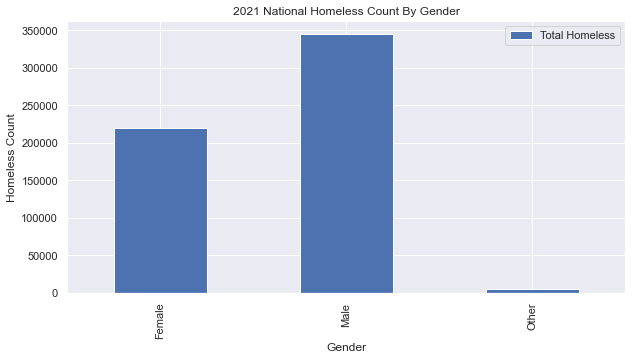

In [145]:
genders = df2020[["State","Overall Homeless - Female, 2020", "Overall Homeless - Male, 2020", "Overall Homeless - Transgender, 2020", "Overall Homeless - Gender Non-Conforming, 2020"]]
genders = genders.set_index("State")
genders = genders.astype(int)

female = genders["Overall Homeless - Female, 2020"].sum()
male = genders["Overall Homeless - Male, 2020"].sum()
other = genders["Overall Homeless - Transgender, 2020"].sum() + genders["Overall Homeless - Gender Non-Conforming, 2020"].sum()

gendersums = pd.DataFrame.from_dict({"Female":female,"Male":male,"Other":other},orient='index',columns=["Total Homeless"])
sns.set(rc={"figure.figsize":(10,5)})
gendersums.plot.bar(xlabel= "Gender", ylabel = "Homeless Count", title = "2021 National Homeless Count By Gender")

Pie Chart Of Homeless By Age:

Adults make up the larget portion of the homeless population but there are a large percent of homeless kids and young adults in the country.

<AxesSubplot:title={'center':'2020 National Homeless Distribution By Gender'}, ylabel='Total Homeless %'>

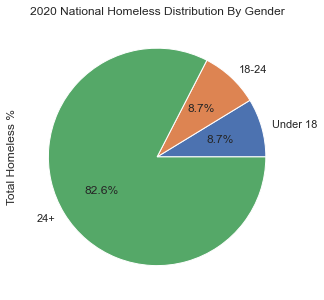

In [146]:
ages = df2020[["State","Overall Homeless - Under 18, 2020","Overall Homeless - Age 18 to 24, 2020","Overall Homeless - Over 24, 2020"]]
ages = ages.set_index("State")
ages = ages.astype(int)

kids = ages["Overall Homeless - Under 18, 2020"].sum()
young = ages["Overall Homeless - Age 18 to 24, 2020"].sum()
adult = ages["Overall Homeless - Over 24, 2020"].sum()

agesums = pd.DataFrame.from_dict({"Under 18":young,"18-24":young,"24+":adult},orient='index',columns=["Total Homeless %"])
agesums.plot.pie(y="Total Homeless %", title = "2020 National Homeless Distribution By Gender",autopct='%1.1f%%', legend = False)

# Analysis Part 2: Regional Impacts
## Louisiana Findings

In [147]:
louisiana = df2020[2:3]
louisiana

,State,Average Temperature,Minimum Wage,1980 Electoral Vote,1984 Electoral Vote,1988 Electoral Vote,1992 Electoral Vote,1996 Electoral Vote,2000 Electoral Vote,2004 Electoral Vote,...,"Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020","Overall Homeless - White, 2020","Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020","Overall Homeless - American Indian or Alaska Native, 2020","Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020","Overall Homeless - Multiple Races, 2020",State ID,Homeless Rate
2,Louisiana,66.4,7.25,R,R,R,D,D,R,R,...,3,88,1165,1908,21,29,5,45,LA,0.000681


### Homeless By State Temperature

In [148]:
homeless_temp = df2020[["Average Temperature","Homeless Rate","State ID"]]
homeless_temp.set_index("State ID", inplace= True)

Weak Negative Correlation

In [149]:
homeless_temp["Average Temperature"].corr(homeless_temp["Homeless Rate"])

-0.09553567731307452

Text(0.5, 1.0, "Scatter Of 2020 Homeless Rate By A State's Average Yearly Temperature")

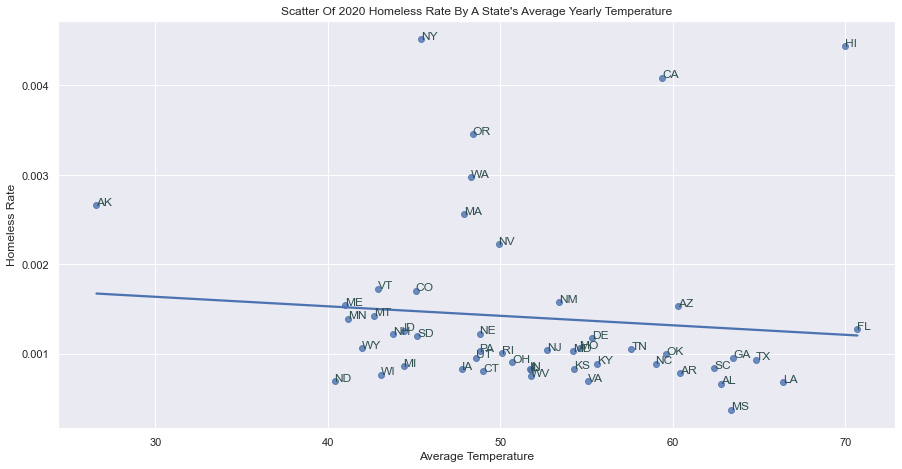

In [151]:
fig, ax = plt.subplots()
sns.set(rc={"figure.figsize":(15,7.5)})

plot1 = sns.regplot(x = "Average Temperature",
            y = "Homeless Rate", 
            ci = None,
            ax=ax,
            data = homeless_temp)

#labels each dot based on its team
for k, v in homeless_temp.iterrows():
    ax.annotate(k, v, family='sans-serif', fontsize=12, color='darkslategrey')
fig.canvas.draw()

plot1.set_title("Scatter Of 2020 Homeless Rate By A State's Average Yearly Temperature")

### Homeless By State Minimum Wage

In [152]:
homeless_wage = df2020[["Minimum Wage","Homeless Rate", "State ID"]]
homeless_wage["Minimum Wage"] = homeless_wage["Minimum Wage"].astype(float)
homeless_wage["Homeless Rate"] = homeless_wage["Homeless Rate"].astype(float)
homeless_wage.set_index("State ID", inplace = True)

Moderate Positive Correlation

In [153]:
homeless_wage["Minimum Wage"].corr(homeless_wage["Homeless Rate"])

0.5908830206536951

Scatter Chart

Text(0.5, 1.0, "Scatter Of 2020 Homeless Rate By A State's Minimum Wage")

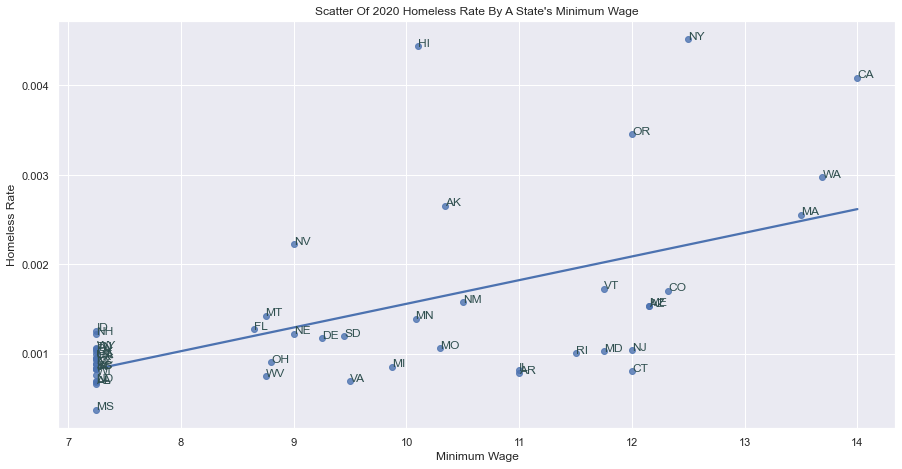

In [157]:
fig, ax = plt.subplots()
sns.set(rc={"figure.figsize":(15,7.5)})

plot2 = sns.regplot(x = "Minimum Wage",
            y = "Homeless Rate", 
            ci = None,
            ax=ax,
            data = homeless_wage)

#labels each dot based on its team
for k, v in homeless_wage.iterrows():
    ax.annotate(k, v, family='sans-serif', fontsize=12, color='darkslategrey')
fig.canvas.draw()

plot2.set_title("Scatter Of 2020 Homeless Rate By A State's Minimum Wage")

Louisiana ($7.25) minimum wage is overlapped by a clump of other states that has left their minim wage at the federal minimum

Reverse affect. As minimum wage increases, homeless increases. This is because homeless people tend to reside in cities. Let's look a step further and see compare with state population and minimum wage.

### Homelessness By State 2020 Electoral Vote

<AxesSubplot:title={'center':'Average Homeless Rate By States 2020 Electoral Vote'}, xlabel='2020 Electoral Vote', ylabel='2020 Homeless Rate'>

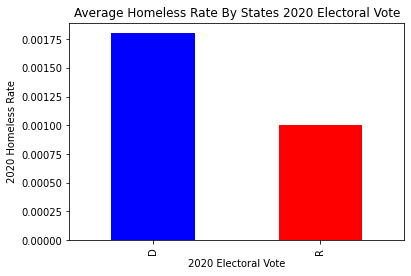

In [76]:
df2020.groupby("2020 Electoral Vote").mean()["Homeless Rate"].plot.bar(color = ["blue","red"],ylabel ="2020 Homeless Rate", title = "Average Homeless Rate By States 2020 Electoral Vote")

I think this line of code is really sleek and offers a great insight into homelessness. What you see above is the average rate of homelessness for states that voted Democrat against Republican states in the 2020 Presidential Election

# Analysis Part 3: Future Predictions
See Next Steps Below - will include a regression that computes the most correlated factors with a states homeless population.

# Next Steps

1. Part 3 of our analysis is to create a predictive model to forecast the homeless population in 2021 and future years. We will create a linear regression model using homeless data over the last 40 years and regress it with the most correlated factors.

2. More charts and visuals will help analyze and present the findings and correlations between states, homeless population, and other factors. This will show which factors are the most correlated with state homelessness data. We will then present our findings and reccomendations in order to reduce homelessness. We especially want to tailor our reccomendations to help improve heomlessness in Louisiana, so we will provide a much more thorough analysis for our next milestone.